### Title: Holly-Mood Mood Tracker App (Data Science Code Jam Project) By Byron Lacuesta

### Summary

In this project, I will be performing Data Analysis and creating a machine

learning model for the Holly-Mood Mood Tracker app.  The project involves

data cleaning/ data preprocessing, various EDA charts such as histograms,

bar charts, and line charts that show relationships between user mood

patterns and other factors (such as weekday, time of the day and hobbies)

which will be incorporated into an interactive dashboard that will be

created with the assistance of: Robert Ogle (Data Scientist), the software

engineering team and the UX/UI team.  I have also created a function that

sends a different message to users depending on user mood score.The project

also involves solving machine learning using the models: Logistic

Regression, Random Forest Classifer, Gradient Boost Classifier in order to

predict whether a user  will have an overall good or bad mood based on

different factors (binary classification task).

In [435]:
#Use drive from google.colab to mount google drive.
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [436]:
#Import the necessary libraries.
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import numpy as np

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

from sklearn.utils import shuffle

from sklearn.metrics import roc_auc_score, roc_curve

In [437]:
#Use pd.read_csv() in order to upload/read the dataset in a local and nonlocal computer.
try:
    df = pd.read_csv('/content/drive/MyDrive/December Code Jam/Daylio_Abid.csv')
except:
    df = pd.read_csv('Daylio_Abid.csv')

In [438]:
#Use the head() method in order to print the first five rows of the dataframe.
df.head()

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


Code Result:

The entries in the rows of the activities column need to be separated into different user entries.  This issue will be addressed further in the project using the explode() function.

### Data Cleaning/ Preprocessing

In [439]:
#Use the pd.to_datetime() method in order to create a datetime column that displays the full date and time.
df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )

#Use df.drop() in order to drop the other date and time columns because the 'datetime' column contains
#the same information.
not_needed_date_columns = ['full_date', 'time', 'date']
df.drop(columns=not_needed_date_columns, inplace=True)

/tmp/ipython-input-3857308672.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )


Rationale:  In order to create  line charts for EDA that display

information regarding user moods over time, I have decided to set the

'datetime' column as the the index for the datafrane.

In [440]:
#Use the set_index() function in order to set the 'datetime' column as the dataframe index.
df.set_index('datetime', inplace=True)
#Use the sort_index() column in order to sort the index in descending order.
df = df.sort_index(ascending=False)

In [441]:
#Use .index.is_monotic_decreasing in order to verify that the dataframe is arranged in chronological order.
print(df.index.is_monotonic_decreasing)

True


In [442]:
#Use .index.is_monotic_increasing in order to verify that the dataframe is arranged in chronological order.
print(df.index.is_monotonic_increasing)

False


Code Result:  It appears that the dataframe index is sorted in chronological order.

In [443]:
#Use the isna() and sum() methods in order to check the columns in the df dataframe for missing values.
df.isna().sum()

,0
weekday,0
sub_mood,0
activities,47
mood,0


Code Result:  

It appears that there are 47 missing values in activities  

column of the df dataframe.  I have decided to drop these missing values in

the cell below.

In [444]:
#Use the dropna() function to drop the missing values in the df dataframe.
df.dropna(inplace=True)
#Use the isna() and sum() methods in order to double check the df dataframe for missing values.
df.isna().sum()

,0
weekday,0
sub_mood,0
activities,0
mood,0


Code Result:

There are no more missing values noted in the df dataframe.  The missing

values were successfully dropped.

In [445]:
#Use the duplicated() and sum() methods to check for duplicate values in the df dataframe.
df.duplicated().sum()

np.int64(1)

Code Result:  There is 1 duplicate value noted in the df dataframe.  This

duplicate value will be dropped in the cell below.

In [446]:
#Use the drop_duplicates() method in order drop duplicate values from the df dataframe.
df.drop_duplicates(inplace=True)
#Use the duplicated() and sum() methods to double check for duplicate values in the df dataframe.
df.duplicated().sum()

np.int64(0)

In [447]:
#Use the info() method in order to check the data types in the df dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 892 entries, 2021-12-04 21:52:00 to 2018-01-03 12:20:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   weekday     892 non-null    object
 1   sub_mood    892 non-null    object
 2   activities  892 non-null    object
 3   mood        892 non-null    object
dtypes: object(4)
memory usage: 34.8+ KB


Code Result:

The columns in the df dataframe appear to have the appropriate data types,

but the weekday, activities, and mood columns will be encoded further in

the project for the purposes of exploratory data analysis (EDA) and machine

learning.

In [448]:
#Use the str.split() method in order to move the '|' dividers from the activities column.
df['activities'] = df['activities'].str.split('|')

In [449]:
#Use the head() method in order to print the first 5 rows of the df dataframe.
df.head()

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal


Code Result: The '|' dividers were successfully removed from the various

activities of the 'activities' column.

### Core Goals

#### Mood Count Barplot (Core Goal)

Core Goal: Create a bar chart showing the frequency of each mood category.

In [450]:
#Use the value_counts() method in order to calculate the total counts in for each category in the
#'mood' column of the df dataframe.  Use reset_index() in order to reset the index.
mood_counts = df['mood'].value_counts().reset_index()
mood_counts.columns = ['mood', 'count']

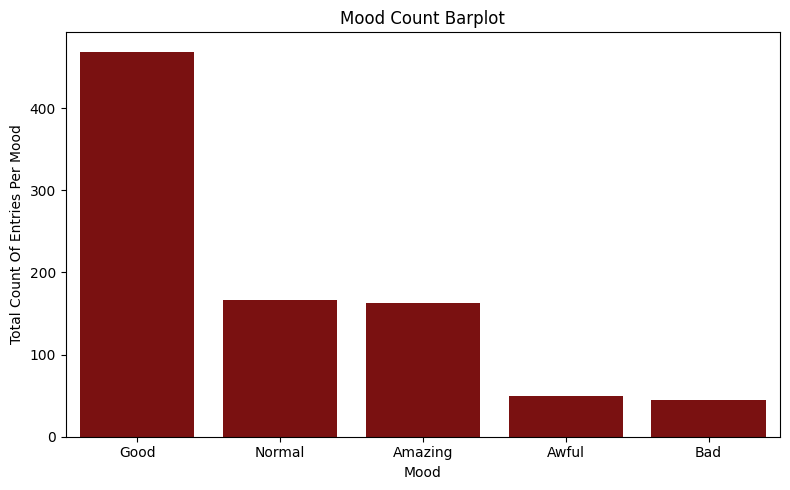

In [451]:
#(Core Goal: A bar chart showing the frequency of each mood category.)
plt.figure(figsize=(8, 5))
plt.title('Mood Count Barplot')
plt.xlabel('Mood')
plt.ylabel('Total Count Of Entries Per Mood')
sns.barplot(data=mood_counts, x='mood', y='count', color='darkred')
plt.savefig('mood_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

Chart Conclusion:

According to the barplot, it appears that users report 'Good' as the mood

more than any other mood category and users report 'Bad' as their mood more

than any other mood category.  


Total Counts For Each Mood Category (Sorted From Highest To Lowest Count):

1) Good - 469 Counts

2) Normal - 166 Counts

3) Amazing - 163 Counts

4) Awful - 49 Counts

5) Bad - 45 Counts


#### Good/Bad Average Weekly Mood Counts Over Time (Core Goal)

Core Goal: Create a line chart showing a numeric mood score or mood

category over time.

In [452]:
#Use the copy() method in order to create a copy from the df dataframe that will be used for a resampled dataframe.
df_copy = df.copy()
#Use the resample() and value_counts() method in order to resmple the data as mood counts mood counts per week.
mood_weekly_counts = df_copy.resample('W')['mood'].value_counts().unstack().fillna(0)

#Create a separate dataframe for good and bad weekly mood counts.
good_mood_weekly_counts = mood_weekly_counts[['Amazing', 'Good', 'Normal']]
bad_mood_weekly_counts = mood_weekly_counts[['Bad', 'Awful']]

#Use the rolling() and mean() methods in order to convert the values in the good_mood_weekly_counts and
#bad_mood_weekly counts into rolling mean values.
#good_smoothed = good_mood_weekly_counts.rolling(window=7, center=True).mean()
#bad_smoothed = bad_mood_weekly_counts.rolling(window=7, center=True).mean()

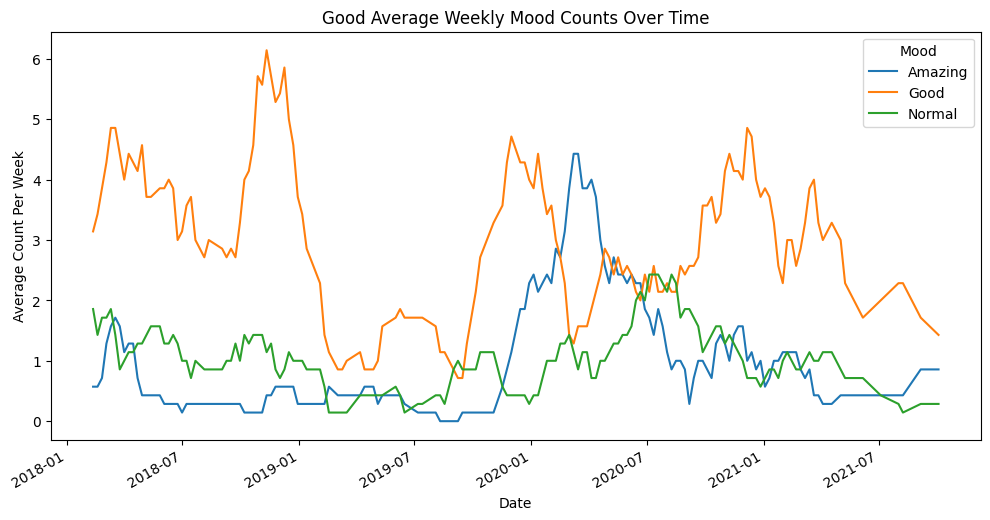

In [453]:
#Use the matplotlib and the plot() method in order to plot the "Good Average Weekly Mood Counts Over Time" line chart.
good_smoothed.plot(figsize=(12,6))
plt.title("Good Average Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('good_mood_linechart.png', dpi=300, bbox_inches='tight')
plt.show()


Line Chart Conclusion:

It appears that there are high peaks in good/ positive average weekly mood

counts ('Amazing', 'Good', 'Normal')  around late December/ early January

and late June/ July throughout every year in the timespan of the the

dataset.  There were also significant/ dramatic troughs/ decreases in good/

positive average weekly mood counts around March and September (excludin

2021) throughout the timespan of the dataset.  From the results, it can be

concluded that good/positive moods in the dataset see an increase in

frequency during the holiday/ new year seasons and in summer.  It also can

be concluded that there is a decrease in frequency of good/positive moods

throughout the dataset around spring and fall seasons.

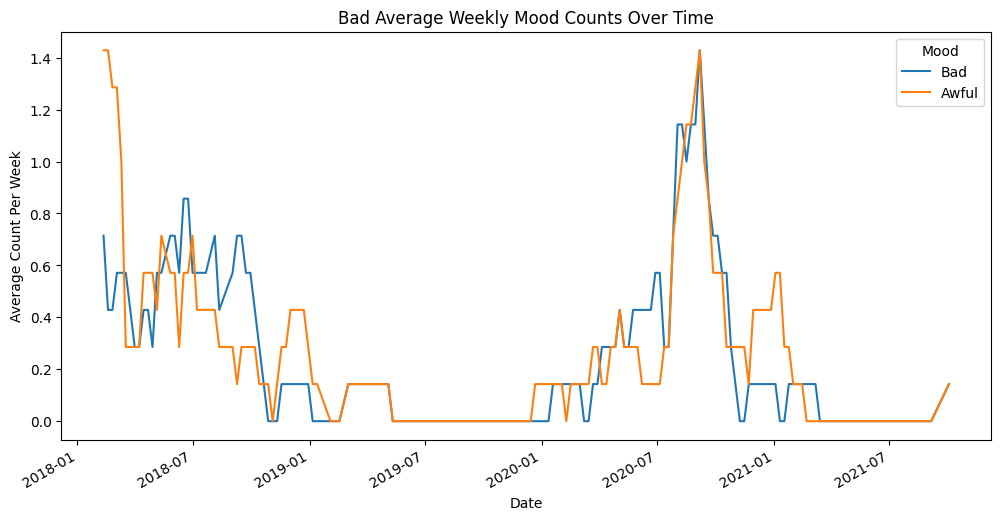

In [454]:
#Use the matplotlib and the plot() method in order to plot the "Bad Average Weekly Mood Counts Over Time" line chart.
bad_smoothed.plot(figsize=(12,6))
plt.title("Bad Average Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('bad_mood_linecharts', dpi=300, bbox_inches='tight')
plt.show()


Linechart Conclusion:

According to the linechart, it appears that there major highs/ peaks in

Bad/ Awful mood frequency around: June 2018 to September 2018 and August to

September 2020.  There are also smaller highs/ peaks in Bad/ Awful mood

frequency around: late December/ early January throughout the timespan of

the dataset (excluding 2018).  There appears to be significant/ consistent

lows in Bad/ Awful mood frequency around: August 2019 to early/mid December

2019 and February/ March 2021 to September 2021.  It can be concluded that

COVID/ COVID isolation policies may possibly contributed to rises in Bad/

Awful mood frequency around: August to September 2020.  It also can be

concluded that there is a population of users in the dataset that regularly

experience increases in Bad/ Awful mood frequencies around the December

holiday season.

#### Summary Statistics (Core Goal)

Core Goal: Include at least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).

In [455]:
#Create a map index for the map for the mood categories with 1 being 'Awful' and 5 Being 'Amazing/
mood_map = {
    'Awful': 1,
    'Bad' : 2,
    'Normal' : 3,
    'Good' : 4,
    'Amazing' : 5
}

#Use the map() method in order to create the 'mood_encoded' column with mapped features.
df['mood_encoded'] = df['mood'].map(mood_map)

In [456]:
#Use the mean() function in order to calculate the average mood score value.
mean_mood_score = df['mood_encoded'].mean()
print(f'Average Mood Score: {mean_mood_score:.2f}')

Average Mood Score: 3.73


Conclusion: It appears that the average mood score for users is: 3.73.  

This average mood score indicates that users on average report moods

between 3 (Normal) and 4 (Good).

In [457]:
#Use the mode() method in order to find the most common mood category.
most_common_mood = df['mood'].mode()
print(f"Most Common Mood Category: {most_common_mood[0]}")

Most Common Mood Category: Good


### Top 10 Most Common Activities Barplot (Core Goal)

Core Goal: Include at least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).

In [458]:
#Use the explode() method in order to create a dataframe that contains entries in the activities column
#as individual entries instead of list form.
activities_explode_df = df.explode('activities')

#Use the str.strip() and str.lower() methods in order to remove any whitespaces from the activites column
#and convert the text the texts in the column to lowercase.
activities_explode_df['activities'] = activities_explode_df['activities'].str.strip().str.lower()
#Use the head() method to print the first 5 rows of the dataframe.
activities_explode_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


Code Result:  The activities_explode_df dataframe was created successfully.

In [459]:
#Use the value_counts method in order to get the counts of each user activity.  Use the reset_index() method to reset the index.
activities_sorted = activities_explode_df['activities'].value_counts().reset_index()
#Use .columns to label the columns appropriately.
activities_sorted.columns = ['activities', 'count']
#Use the sort_values() method in order to sort the activities dataframe in descending order.
activities_sorted = activities_sorted.sort_values(by='count', ascending=False)
#Use the head() method in order to create a dataframe that consists of only the top 10 user activities.
top_10_activities = activities_sorted.head(10)

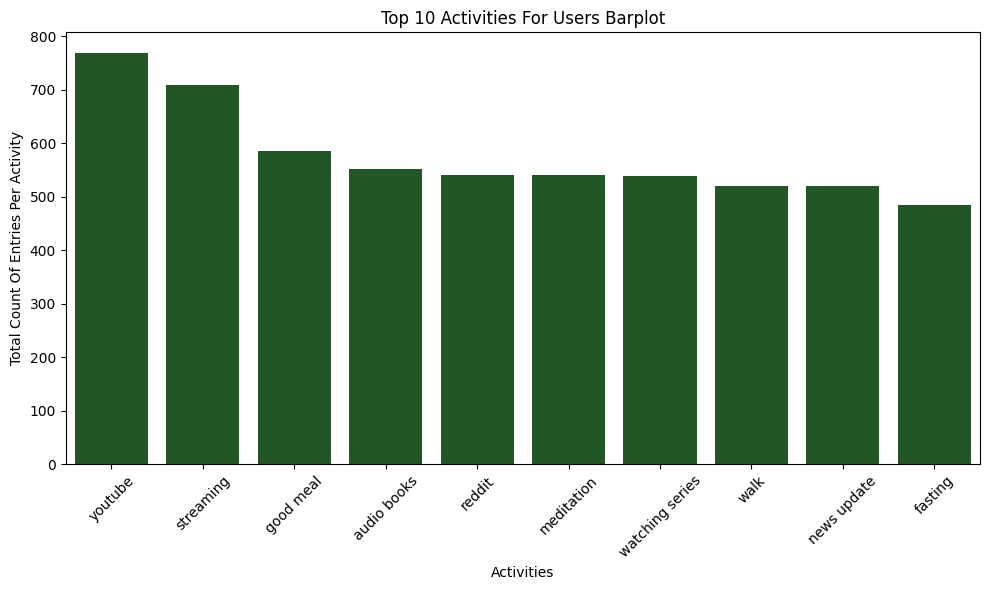

In [460]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
plt.figure(figsize=(10, 6))
plt.title('Top 10 Activities For Users Barplot')
plt.xlabel('Activities')
plt.ylabel('Total Count Of Entries Per Activity')
sns.barplot(data=top_10_activities, x='activities', y='count', color='#1B5E20')
plt.xticks(rotation=45)
plt.savefig('top_10_activities_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

Chart Conclusions:

* The top 10 most popular activities for users mainly consists of: media

based activities (such as YouTube, streaming, and audiobooks) and self care

based activities (such as eating a good meal, meditation, and fasting).

* Media based activities appear to be more popular among users than self

care based activities, with YouTube having a total count of 770 user

entries and Streaming having a total count of 710 user entries.

In [461]:
#Display the top 10 user activities and their counts.
top_10_activities

,activities,count
0,youtube,769
1,streaming,709
2,good meal,586
3,audio books,552
4,reddit,541
5,meditation,540
6,watching series,538
7,walk,520
8,news update,520
9,fasting,484


### Stretch Goals

### Mood Score and Activites Correlation Heatmap (Stretch Goal)

Stretch Goal: Mood vs. Activities Heatmap

In [462]:
#Use conditional indexing in order to filter the activities_sorted dataframe to show activities with medium/ average popularity.
medium_freq_activities = activities_sorted[(activities_sorted['count'] >= 365) & (activities_sorted['count'] <= 405)]
medium_freq_activities.head(3)

,activities,count
11,power nap,400
12,prayer,398
13,penpal,388


In [463]:
#Use the tail() method in order to print the bottom 5 least popular activities among users.
activities_sorted.tail()

,activities,count
52,phd,7
53,party,6
54,hospital,4
55,video editing,3
56,hiking,3


In [464]:
#Create a list of activities to be included in the heatmap.
activities_corr_list = [
    'youtube',
    'streaming',
    'good meal',
    'audio books',
    'reddit',
    'video editing',
    'hiking',
    'party',
    'phd',
    'power nap',
    'penpal',
    'hospital'
    ]

#Use the isin() method in order to create a dataframe for the correlation chart consisting of user rows that only
#have entries in the 'activities' column that are present in activities_corr_list.
activities_corr_df = activities_explode_df[activities_explode_df['activities'].isin(activities_corr_list)]
#Use the pd.get_dummies() to perform one hot encoding on the 'activities' column of the activities_corr_df dataframe.
activities_encoded = pd.get_dummies(activities_corr_df['activities'], dtype=int)
#Use the pd.concat() in order to concatenate the activities encoded and the 'mood_encoded' column of activities_corr_df
#into one dataframe.
activities_mood = pd.concat([activities_encoded, activities_corr_df['mood_encoded']], axis=1)

In [465]:
#Use corr() method to calculate the correlation between the selected user activities and the 'mood_encoded' columnn.
activities_corr = activities_mood.corr()['mood_encoded'].drop('mood_encoded').sort_values(ascending=False)

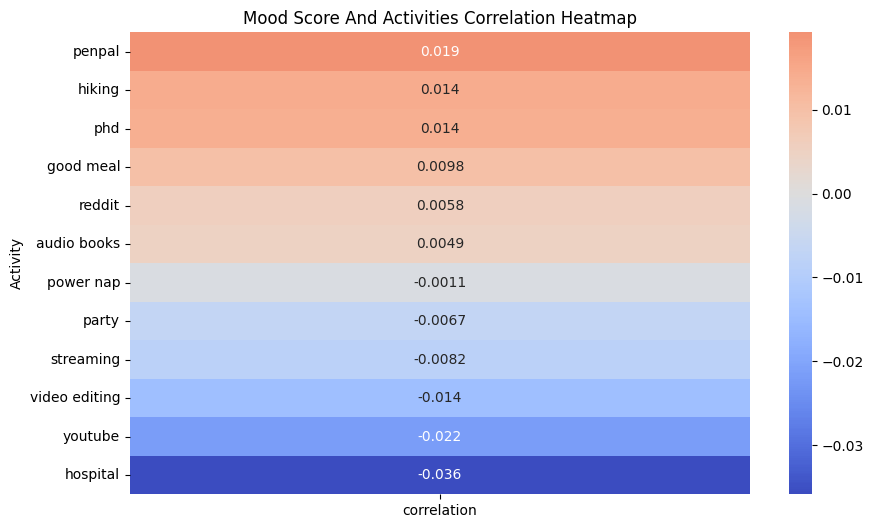

In [466]:
#Use matplotlib and sns.heatmap() in order to plot the 'Mood Score And Activities Correlation Heatmap'.
plt.figure(figsize=(10, 6))
sns.heatmap(
    activities_corr.to_frame(name='correlation'),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Mood Score And Activities Correlation Heatmap')
plt.ylabel("Activity")
plt.savefig('mood_activites_corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


Correlation Heatmap Conclusions:

* This heatmap displays the correlation between various user activities and

mood score.  

* From the activities, it appears that self care/ self improvement

activities such as: penpal, hiking, and phd study had the most positive

correlations with mood score.

* Although popular among users, media based activities such as YouTube and

streaming had the most negative correlation with mood score.

* Penpal was the activity with the most positive correlation with mood

score and hospital was the activity with the most negative correlation with

mood score.

* There appears to be no linear correlation with activity popularity and

### Good Mood/ Bad Mood Count Per Weekday Bar Charts (Stretch Goal)

Strech Goal: Visualize mood trend by time of day or weekday using grouped line/bar charts

In [467]:
#Create two separate dataframes for users with good mood entries and users with bad mood entries.
df_bad_weekday = df[df['mood_encoded'] <= 2]
df_good_weekday = df[df['mood_encoded'] >= 3]

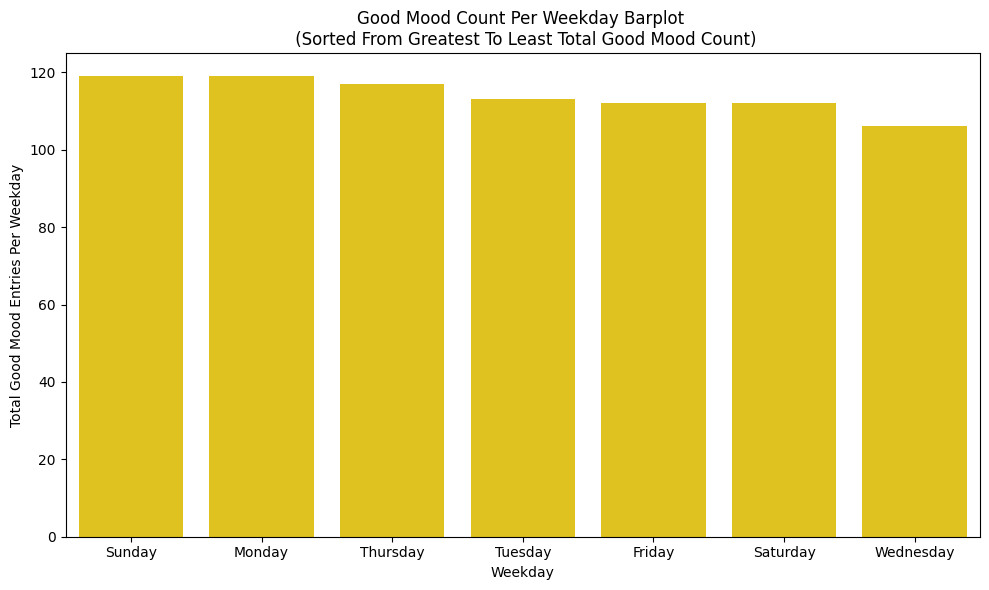

In [468]:
#Use the value_counts() method in order to get a count of good mood entries per weekday.
good_weekday_counts = df_good_weekday['weekday'].value_counts().reset_index()
#Use .columns method in order to label the columns appropriately.
good_weekday_counts.columns = ['weekday', 'count']

#Use matplotlib and sns.barplot() in order to plot the 'Good Mood Count Per Weekday Barplot'.
plt.figure(figsize=(10, 6))
sns.barplot(data=good_weekday_counts, x='weekday', y='count', color='gold')
plt.title('Good Mood Count Per Weekday Barplot \n (Sorted From Greatest To Least Total Good Mood Count)')
plt.ylabel('Total Good Mood Entries Per Weekday')
plt.xlabel('Weekday')

plt.savefig('good_mood_count_weekday.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

Chart Conclusion:

It appears that Sunday had the good mood count, with a total good mood count of: 119.  Wednesday had the lowest good mood count with a count of: 106.

In [469]:
good_weekday_counts

,weekday,count
0,Sunday,119
1,Monday,119
2,Thursday,117
3,Tuesday,113
4,Friday,112
5,Saturday,112
6,Wednesday,106


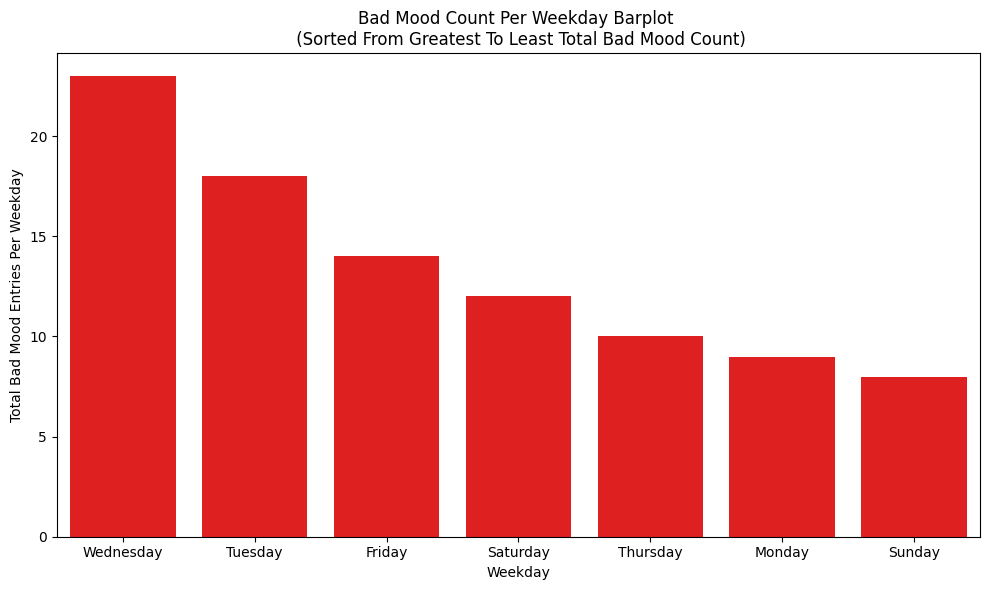

In [470]:
#Use the value_counts() method in order to get a count of bad mood entries per weekday.
bad_weekday_counts = df_bad_weekday['weekday'].value_counts().reset_index()
#Use .columns method in order to label the columns appropriately.
bad_weekday_counts.columns = ['weekday', 'count']

#Use matplotlib and sns.barplot() in order to plot the 'Good Mood Count Per Weekday Barplot'.
plt.figure(figsize=(10, 6))
sns.barplot(data=bad_weekday_counts, x='weekday', y='count', color='red')
plt.title('Bad Mood Count Per Weekday Barplot \n (Sorted From Greatest To Least Total Bad Mood Count)')
plt.ylabel('Total Bad Mood Entries Per Weekday')
plt.xlabel('Weekday')

plt.savefig('bad_mood_count_weekday.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

Chart Conclusion:

It appears that Wednesday had the highest bad mood count with a bad mood

count of: 23.  Sunday had the highest bad mood count with a bad mood count

of: 8.

In [471]:
bad_weekday_counts

,weekday,count
0,Wednesday,23
1,Tuesday,18
2,Friday,14
3,Saturday,12
4,Thursday,10
5,Monday,9
6,Sunday,8


### mood_alert() Function (Stretch goal)

Stretch Goal: Add basic anomaly or pattern detection (e.g., highlight unusual mood drops or consistent weekly patterns).

In [472]:
#Create a function that prints out a message if a user is having a good mood or a bad mood.
def mood_alert(df, mood_score_column, row_num):
  mood = df.iloc[row_num][mood_score_column]

  mood = pd.to_numeric(mood, errors='coerce')

  if pd.isna(mood):
    print("Mood value is missing or invalid")
  elif mood <= 2:
    print(f"I noticed you're having a rough day. Have you tried doing anything to improve your mood?")
  elif mood >= 3:
    print(f"I noticed you're in a good mood today. Keep up the good work!")
  else:
    print("Mood score out of expected range.")

In [473]:
#Use the mood_alert() function to print out a mood alert message for the user in row # 4.
mood_alert(user_df, 'mood_encoded', 4)

I noticed you're in a good mood today. Keep up the good work!


In [474]:
#Use the mood_alert() function to print out a mood alert message for the user in row # 19.
mood_alert(user_df, 'mood_encoded', 19)

I noticed you're having a rough day. Have you tried doing anything to improve your mood?


### Encoding Target And Features For Machine Learning

In [475]:
#Use the copy() method in order to create a copy dataframe of activities_explode_df that will be used to train
#the machine learning models.
ml_df = activities_explode_df.copy()


In [476]:
#Create a map to encode the mood categories in the mood column for a binary classification task, with moods: 'Awful' and 'Bad'
#being the '0' class and moods: 'Good', 'Normal', and 'Amazing' being the '1' class.
mood_binary_map = {
    'Awful': 0,
    'Bad' : 0,
    'Good': 1,
    'Normal' : 1,
    'Amazing': 1
}

#Use the map() function in order to encode the 'mood' column of the ml_df dataframe.  This column will be used as the
#target column for the models.
ml_df['mood'] = ml_df['mood'].map(mood_binary_map)

In [477]:
#Use the drop() method in order to drop the 'sub_mood' and 'mood_encoded' columns because
#these columns will cause target leakage.
ml_df = ml_df.drop(['sub_mood', 'mood_encoded'], axis=1)

In [478]:
#Create a index in order to encode the days of the week.
weekday_map = {
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6,
    'Sunday' : 7
}

#Use the map() column to encode the 'weekday' column.
ml_df['weekday'] = ml_df['weekday'].map(weekday_map)

In [479]:
#Use the value_counts() and to_dict() columns to create a frequency map to perform frequency
#encoding on the 'activties' column of the ml_df dataframe.
freq_map = ml_df['activities'].value_counts().to_dict()

#Use the map() to create the 'activities_freq' encoded column that consists of values encoded
#using frequency encoding.
ml_df['activities_freq'] = ml_df['activities'].map(freq_map)

### Morning And Evening Mood Score Distribution Charts (Stretch Goal)

Stretch Goal: Vizualize mood trend by time of day or weekday using grouped line/bar charts.

In [480]:
#Use index.hour in order to create the 'hour' column in the df dataframe.
df['hour'] = df.index.hour

#Use conditional filtering to create dataframes that contain user morning and evening values.
morning_df = df[(df['hour'] >= 6) & (df['hour'] < 12)]
evening_df = df[(df['hour'] >= 17) & (df['hour'] <= 23)]
morning_df['mood_encoded'] = morning_df['mood_encoded'].astype(int)
evening_df['mood_encoded'] = evening_df['mood_encoded'].astype(int)

/tmp/ipython-input-358863567.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_df['mood_encoded'] = morning_df['mood_encoded'].astype(int)
/tmp/ipython-input-358863567.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening_df['mood_encoded'] = evening_df['mood_encoded'].astype(int)


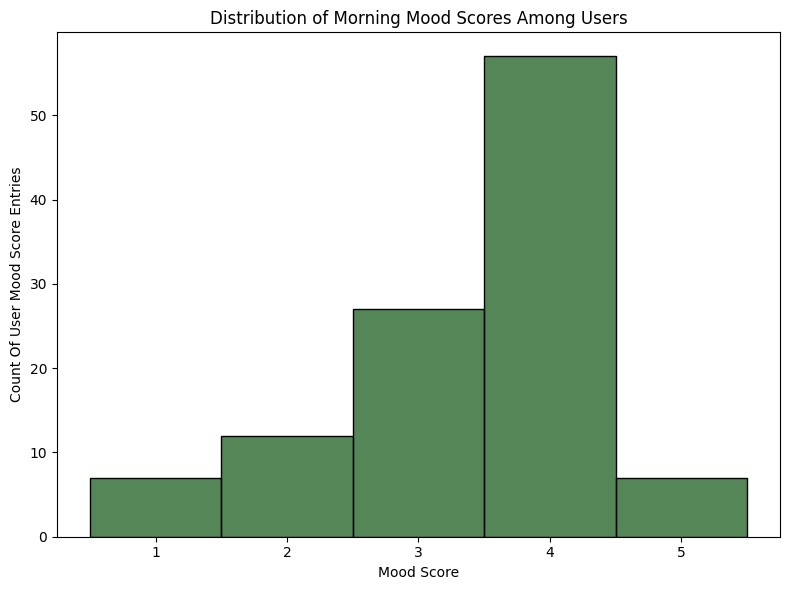

In [481]:
#Use matplotlib and sns.histplot() in order to create the 'Distribution of Morning Mood Scores Among Users'
#histogram.
plt.figure(figsize=(8, 6))
sns.histplot(
    data=morning_df['mood_encoded'],
    discrete=True,
    color='#1B5E20'
    )

plt.title('Distribution of Morning Mood Scores Among Users')
plt.xlabel('Mood Score')
plt.ylabel('Count Of User Mood Score Entries')
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()

Code Result:

It appears that the most common morning mood score for users is '4' (Good),

with a total count of: 57 entries.

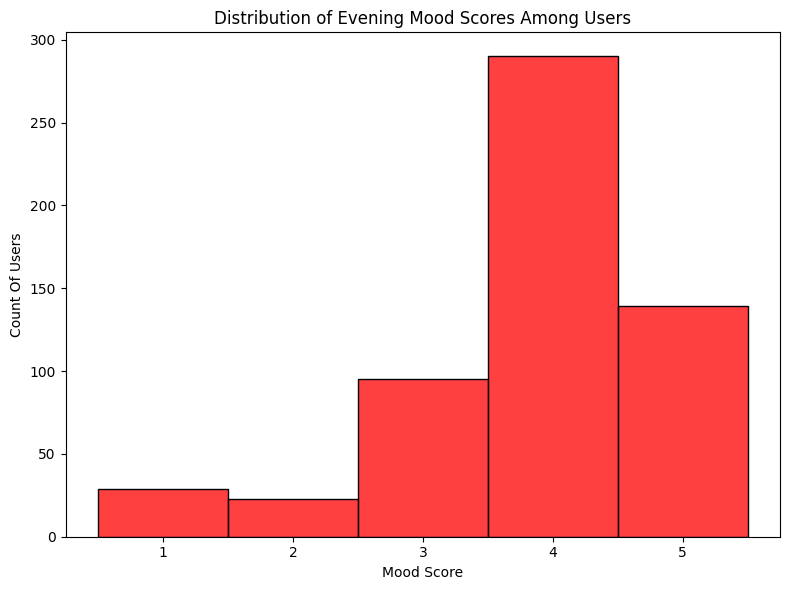

In [482]:
#Use matplotlib and sns.histplot() in order to create the 'Distribution of Morning Mood Scores Among Users'
#histogram.
plt.figure(figsize=(8, 6))
sns.histplot(
    data=evening_df['mood_encoded'],
    discrete=True,
    color='red'
    )
plt.title('Distribution of Evening Mood Scores Among Users')
plt.xlabel('Mood Score')
plt.ylabel('Count Of Users')
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()


Code Result:

It appears that the most common evening mood score for users is '4' (Good),

with a total count of: 290 entries.  It also, appears that there are

overall more 'Good' mood score entries among users in the evening than in

the morning.

### Examining Class Imbalance

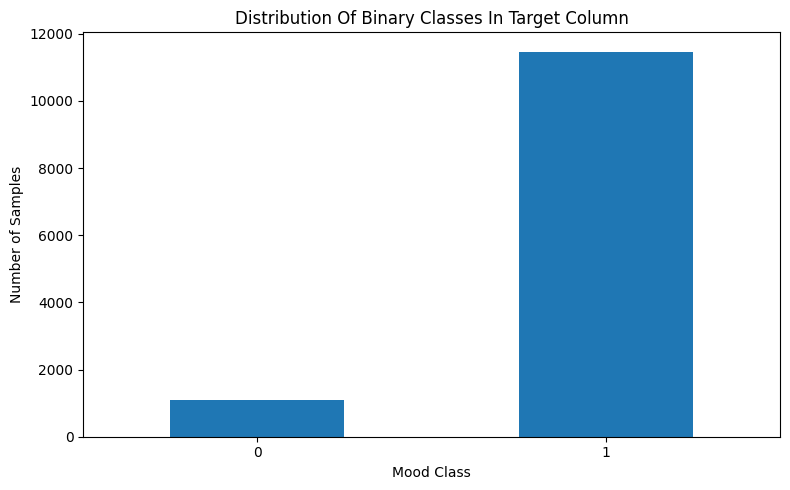

In [483]:
#Use the value_counts() and sort_index() method in order to count the '0' and '1' classes in the 'mood
#column.
mood_counts = ml_df['mood'].value_counts().sort_index()

#Use the plot() method in order to plot the 'Distribution Of Binary Classes In Target Column' bar chart.
mood_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Distribution Of Binary Classes In Target Column")
plt.xlabel("Mood Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [484]:
#Print the '0' class counts.
zero_counts = (ml_df['mood'] == 0).sum()

print(f"'0' (Bad Mood) Class Counts: {zero_counts}")

'0' (Bad Mood) Class Counts: 1089


In [485]:
#Print the '1' class counts.
one_counts = (ml_df['mood'] == 1).sum()

print(f"'1' (Good mood) Class Counts: {one_counts}")

'1' (Good mood) Class Counts: 11469


Class Imbalance Chart Result:

It appears that there is major class imbalance with the '1' class (majority

class) greatly outnumbering the '0' class (minority class).  To address

this class imbalance issue, I have trained the model in the project with

upsampled features and I will adjust the threshold on the model with the

best scoring metrics.

### Feature Upsampling

In [486]:
#Use np.random.seed() in order to create a random state for the models.
state = 12345

#Create target and features for the machine learning models.
y = ml_df['mood']
X = ml_df[['activities_freq', 'weekday']]

In [487]:
#Create a function that will upsample the minority class ('0' class)  in the features and target in order to address the class imbalance.
def upsample(features, target):
  features_zeros = features[target ==0]
  features_ones = features[target == 1]
  target_zeros = target[target == 0]
  target_ones = target[target == 1]

  n_zeros = len(target_zeros)
  n_ones = len(target_ones)

  repeat = n_ones // n_zeros

  features_upsampled = pd.concat([features_zeros] * repeat + [features_ones])
  target_upsampled = pd.concat([target_zeros] * repeat + [target_ones])

  features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=state)

  return features_upsampled, target_upsampled

In [488]:
#Use the upsample() method in order to create the upsampled target and features.
X_upsampled, y_upsampled = upsample(X, y)

In [489]:
#Use the train_test_split() function in order split the data into training, validation, and test sets (60/20/20 split).
X_train_upsampled, X_vt_upsampled, y_train_upsampled, y_vt_upsampled = train_test_split(X_upsampled, y_upsampled, test_size=0.4, random_state=state)

X_valid_upsampled, X_test_upsampled, y_valid_upsampled, y_test_upsampled = train_test_split(X_vt_upsampled, y_vt_upsampled, test_size=0.5, random_state=state)

### Prediction Results Function

In [490]:
#Create a function that will print out: the macro f1 score, confusion matrix and classification report.
def prediction_results(model, X, y, dataset_name="Dataset", average='macro'):
    y_pred = model.predict(X)

    f1 = f1_score(y, y_pred, average=average)

    print(f"\n{dataset_name} Results")
    print("-" * 30)
    print(f"F1 Score ({average}): {f1:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y, y_pred))

    print("\nClassification Report:")
    print(classification_report(y, y_pred))

    return f1


### Logisitc Regression Model

In [491]:
#Use LogisisticRegression() in order to create a Logistic Regression model.
lr = LogisticRegression()

#Use the fit() method in order to train the Logistic Regression model.
lr.fit(X_train_upsampled, y_train_upsampled)

LogisticRegression()

In [492]:
#Use the prediction_results() method to print the model's: macro F1 score, confusion matrix and classification report.
lr_train_pred_f1 = prediction_results(lr, X_valid_upsampled, y_valid_upsampled, dataset_name="Upsampled Validation Set", average='macro')


Upsampled Validation Set Results
------------------------------
F1 Score (macro): 0.3929

Confusion Matrix:
[[ 167 2024]
 [ 187 2094]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.08      0.13      2191
           1       0.51      0.92      0.65      2281

    accuracy                           0.51      4472
   macro avg       0.49      0.50      0.39      4472
weighted avg       0.49      0.51      0.40      4472



Logistic Regression Model Validation Set Prediction Conclusion:

When predicting on the validations set, the Logistic Regression model

had: a macro F1 score of: 0.3929, a precision score of 0.51, and a recall

score of 0.92 when predicting the '1' class (intended prediction class).

According to the results, the Logistic Regression model has a weak ability

to distinguish between classes and because the model has a higher recall

score of 0.88 this model has a greater bias towards predicting the '1'

class (majority class) than the '0' class (minority class).  Because of

these results, the Logistic Regression model would not be a good candidate

for being the best model in the project.

### Random Forest Classifier

In [493]:
#Use RandomForestClassifier() in order to create a Random Forest Classifier model.
rf = RandomForestClassifier(random_state=state)

#Create a parameter grid for the Random Forest Classifier model.
rf_param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "max_features": ["sqrt", 0.5]
}

In [494]:
#Use GridSearchCV() in order to create a GridSearch CV model for hyperparameter tuning.
rf_gsearch = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=1
)

#Use the fit() method in order to train the Random Forest Classifier model.
rf_gsearch.fit(X_train_upsampled, y_train_upsampled)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [200, 400]},
             scoring='f1_macro', verbose=1)

In [495]:
#Print the model's best hyperparameter and best score.
print(f"Random Forest Classifier Model Best Hyperparameters: {rf_gsearch.best_params_}")
print(f"Random Forest Classifier Model Best F1 Score: {rf_gsearch.best_score_:.2f}")

Random Forest Classifier Model Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Random Forest Classifier Model Best F1 Score: 0.60


In [496]:
#Recreate the Random Forest Classifier model with tuned hyperparameters.
rf = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=400,
    random_state=state
)

#Use the fit() method to train the model.
rf.fit(X_train_upsampled, y_train_upsampled)

RandomForestClassifier(max_depth=10, n_estimators=400, random_state=12345)

In [497]:
#Use the prediction_results() method to print the model's: macro F1 score, confusion matrix and classification report.
rf_valid_pred_f1 = prediction_results(rf, X_valid_upsampled, y_valid_upsampled, dataset_name="Upsampled Validation Set", average='macro')



Upsampled Validation Set Results
------------------------------
F1 Score (macro): 0.5966

Confusion Matrix:
[[1319  872]
 [ 932 1349]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.60      0.59      2191
           1       0.61      0.59      0.60      2281

    accuracy                           0.60      4472
   macro avg       0.60      0.60      0.60      4472
weighted avg       0.60      0.60      0.60      4472



Random Forest Classifier Model Validation Set Prediction Conclusion:

When predicting on the validations set, the Random Forest Classifier model

had: a macro F1 score of: 0.5966, a precision score of 0.61, and a recall

score of 0.59 when predicting the '1' class (intended prediction class).  

This model has a moderate and balanced ability to distinguish between

classes.  

### Gradient Boost Classifier Model

In [498]:
#Use GradientBoostingClassifier() in order to create a Random Forest Classifier model.
gbc = GradientBoostingClassifier(random_state=state)

In [499]:
#Create a parameter grid for the Gradient Boosting Classifier model.
gbc_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [2, 3],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "subsample": [0.8, 1.0],
    "max_features": [None, "sqrt"],
}

In [500]:
#Use GridSearchCV() in order to create a GridSearch CV model for hyperparameter tuning.
gbc_gsearch = GridSearchCV(
    estimator=gbc,
    param_grid=gbc_param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
    )

#Use the fit() method in order to train the Gradient Boosting Classifier model.
gbc_gsearch.fit(X_train_upsampled, y_train_upsampled)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [2, 3],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1_macro', verbose=1)

In [501]:
#Print the model's best hyperparameter and best score.
print(f"Gradient Boost Classifier Model Best Hyperparameters: {gbc_gsearch.best_params_}")
print(f"Gradient Boost Classifier Model Best F1 Score: {gbc_gsearch.best_score_:.2f}")

Gradient Boost Classifier Model Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}
Gradient Boost Classifier Model Best F1 Score: 0.60


In [502]:
#Recreate the Gradient Boosting Classifier model with tuned hyperparameters.
gbc = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200,
    subsample=0.8,
    random_state=state)


#Use the fit() method to train the model.
gbc.fit(X_train_upsampled, y_train_upsampled)

GradientBoostingClassifier(min_samples_split=10, n_estimators=200,
                           random_state=12345, subsample=0.8)

In [503]:
#Use the prediction_results() method to print the model's: macro F1 score, confusion matrix and classification report.
gbc_valid_pred_f1 = prediction_results(gbc, X_valid_upsampled, y_valid_upsampled, dataset_name="Upsampled Validation Set", average='macro')


Upsampled Validation Set Results
------------------------------
F1 Score (macro): 0.6076

Confusion Matrix:
[[1235  956]
 [ 793 1488]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.56      0.59      2191
           1       0.61      0.65      0.63      2281

    accuracy                           0.61      4472
   macro avg       0.61      0.61      0.61      4472
weighted avg       0.61      0.61      0.61      4472



Gradient Boost Classifier Model Validation Set Prediction Conclusion:

When predicting on the validations set, the Gradient Boost Classifier model

had: a macro F1 score of: 0.6076, a precision score of 0.61, and a recall

score of 0.65 when predicting the '1' class (intended prediction class).  

This model has a moderate and balanced ability to distinguish between

classes.

### XG Boost Classifier Model

In [504]:
#Use XGBClassifier() in order to create a XG Boost Classifier model.
xgbc = XGBClassifier(random_state=state)

In [505]:
#Create a parameter grid for the XG Boost Classifier model.
xgbc_param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [2, 3],
    "learning_rate": [0.05, 0.1],
    "min_child_weight": [1, 5],
    "subsample": [0.8, 1.0],
    "gamma": [0, 0.3],
    "reg_lambda": [1.0, 5.0],
    "scale_pos_weight": [1, 5]
}

In [506]:
#Use GridSearchCV() in order to create a GridSearch CV model for hyperparameter tuning.
xgbc_gsearch = GridSearchCV(
    estimator=xgbc,
    param_grid=xgbc_param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=1
)


#Use the fit() method to train the model.
xgbc_gsearch.fit(X_train_upsampled, y_train_upsampled)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.3], 'learning_rate': [0.05, 0.1],
                         'max_depth': [2, 3], 'min_child_weight': [1, 5],
                         'n_estimators': [200, 400], 'reg_lambda': [1.0, 5.0],
                         'scale_pos_weight': [1, 5], 'subsample': [0.8, 1.0]},
             scoring='f1_macro', verbose=1)

In [507]:
#Print the model's best hyperparameter and best score.
print(f"XgBoost Classifier Model Best Hyperparameters: {xgbc_gsearch.best_params_}")
print(f"XGBoost Classifier Model Best Score: {xgbc_gsearch.best_score_:.2f}")

XgBoost Classifier Model Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 400, 'reg_lambda': 1.0, 'scale_pos_weight': 1, 'subsample': 1.0}
XGBoost Classifier Model Best Score: 0.60


In [508]:
#Recreate the XG Boost Classifier model with tuned hyperparameters.
xgbc = XGBClassifier(
    gamma=0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    n_estimators=400,
    reg_lambda=1.0,
    scale_pos_weight=1,
    subsample=1.0,
    random_state=state
)


#Use the fit() method to train the model.
xgbc.fit(X_train_upsampled, y_train_upsampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, ...)

In [509]:
#Use the prediction_results() method to print the model's: macro F1 score, confusion matrix and classification report.
xgbc_valid_pred_f1 = prediction_results(xgbc, X_valid_upsampled, y_valid_upsampled, dataset_name="Upsampled Validation Set", average='macro')


Upsampled Validation Set Results
------------------------------
F1 Score (macro): 0.6069

Confusion Matrix:
[[1228  963]
 [ 789 1492]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.56      0.58      2191
           1       0.61      0.65      0.63      2281

    accuracy                           0.61      4472
   macro avg       0.61      0.61      0.61      4472
weighted avg       0.61      0.61      0.61      4472



XG Boost Classifier Model Validation Set Prediction Conclusion:

When predicting on the validations set, the XG Boost Classifier model

had: a macro F1 score of: 0.5894, a precision score of 0.59, and a recall

score of 0.62 when predicting the '1' class (intended prediction class).  

This model has a moderate and balanced ability to distinguish between

classes, but the model did not have a better macro F1 score than the

Random Forest Classifier model which is the best model in the project so  

far.

### Choosing The Best Model (Gradient Boost Classifier)

Best Model Choice (Gradient Boost Classifier Model):

Out of all the model choices, the Random Forest Classifier Model (trained

with upsampled features) had the best prediction results with: a macro F1

score of: 0.6076, a precision score of 0.61, and a recall score of 0.65

when predicting the '1' class (intended prediction class).    In the cells

below, I have performed a prediction on the test set using the Gradient

Boost Classifier model.


In [519]:
#Use the prediction_results() method to print the model's: macro F1 score, confusion matrix and classification report.
rf_test_pred_f1 = prediction_results(gbc, X_test_upsampled, y_test_upsampled, dataset_name="Upsampled Test Set", average='macro')


Upsampled Test Set Results
------------------------------
F1 Score (macro): 0.6017

Confusion Matrix:
[[1218  951]
 [ 824 1479]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      2169
           1       0.61      0.64      0.62      2303

    accuracy                           0.60      4472
   macro avg       0.60      0.60      0.60      4472
weighted avg       0.60      0.60      0.60      4472



Gradient Boost Classifier Model Test Set Prediction:

According to the test set prediction, the Gradient Boost Classifier model

had: a macro F1 score of: 0.6017, a precision score of 0.61, and a recall

score of 0.64 when predicting the '1' class (intended prediction class).  

 In the cells below, I made a prediction on the  test set using the

 Gradient Boost Classifier model with threshold adjustment in order to

 examine if threshold adjustment will improve the model's prediction

 results.

### Threshold Adjustment

In [511]:
#Create function to make a custom model prediction with threshold adjustment.
def custom_predict(model, X, threshold):
    y_probs = model.predict_proba(X)[:, 1]
    y_pred = (y_probs >= threshold).astype(int)
    return y_pred

In [520]:
#Use np.arange() in order to create multiple thresholds to be used for threshold adjustment.
thresholds = np.arange(0.25, 0.55, 0.02)

#Create a for loop that prints the model's macro F1 score across multiple thresholds.
for t in thresholds:
    rf_us_test_pred = custom_predict(gbc, X_test_upsampled, t)
    f1 = f1_score(y_test_upsampled, rf_us_test_pred, average="macro")
    print(f"threshold={t:.2f}, macro_f1={f1:.3f}")

threshold=0.25, macro_f1=0.362
threshold=0.27, macro_f1=0.387
threshold=0.29, macro_f1=0.395
threshold=0.31, macro_f1=0.408
threshold=0.33, macro_f1=0.433
threshold=0.35, macro_f1=0.451
threshold=0.37, macro_f1=0.469
threshold=0.39, macro_f1=0.496
threshold=0.41, macro_f1=0.504
threshold=0.43, macro_f1=0.543
threshold=0.45, macro_f1=0.578
threshold=0.47, macro_f1=0.597
threshold=0.49, macro_f1=0.600
threshold=0.51, macro_f1=0.603
threshold=0.53, macro_f1=0.598
threshold=0.55, macro_f1=0.589


Code Result:  

It appears that adjusting the model probability prediction threshold to     

0.49 can possibly generate the highest possible macro F1 score (0.604).

In [526]:
#Use the custom_predict() method to get the model prediction with threshold adjustment.
gbc_test_predict_tr = custom_predict(gbc, X_test_upsampled, 0.51)

In [527]:
#Use the f1_score() method in order to get the model's macro F1 score with threshold adjustment.
gbc_tr_test_f1 = f1_score(y_test_upsampled, gbc_test_predict_tr, average='macro')
print(f"Gradient Boost Classifier (Upsampled + Threshold Adjustment) Test F1 Score: {rf_tr_valid_f1:.2f}")

Gradient Boost Classifier (Upsampled + Threshold Adjustment) Test F1 Score: 0.59


In [528]:
#Use the confusion_matrix() method in order to print the model's confusion matrix with threshold adjustment.
gbc_tr_test_cm = confusion_matrix(y_test_upsampled, gbc_test_predict_tr)
print("Gradient Boost Classifier (Upsampled + Threshold Adjustment) Test Confusion Matrix:")
print(rf_tr_test_cm)

Gradient Boost Classifier (Upsampled + Threshold Adjustment) Test Confusion Matrix:
[[1268  901]
 [ 871 1432]]


In [530]:
#Use the classification_report() method in order to print the model's classification report with
#threshold adjustment.
gbc_tr_test_cr = classification_report(y_test_upsampled, gbc_test_predict_tr)
print("Gradient Boost Classifier (Upsampled + Threshold Adjustment) Test Set Classification Report:")
print(gbc_tr_test_cr)

Gradient Boost Classifier (Upsampled + Threshold Adjustment) Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.58      0.59      2169
           1       0.61      0.62      0.62      2303

    accuracy                           0.60      4472
   macro avg       0.60      0.60      0.60      4472
weighted avg       0.60      0.60      0.60      4472



Gradient Boost Classifier Model Threshold Adjustment Prediciton Results:

After adjusting the model's threshold to 0.51 and making a prediction on

the test set, the Gradient Boost Classifier model's prediction results are:

a macro F1 score of: 0.59, a precision score of 0.61, and a recall

score of 0.62 when predicting the '1' class (intended prediction class).  

Because the model's prediction results are worse after threshold

adjustment, threshold adjustment would not be required/ recommended method

to improve the Gradient Boost Classifier model's prediction results.


### Gradient Boost Classifier Model ROC Curve

In [517]:
#Create a function to display the model ROC-AUC score and plot the ROC Curve.
def model_roc_auc(model, X_test, y_test):
    model_y_pred_proba = model.predict_proba(X_test)
    model_y_pred_proba = model_y_pred_proba[:, 1]
    model_roc_auc = roc_auc_score(y_test, model_y_pred_proba)

    return model_roc_auc

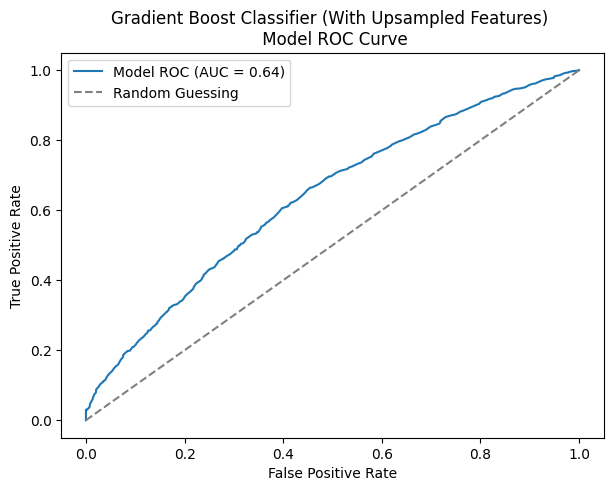

In [531]:
#Use the previously created model_roc_auc() function to calculate ROC-AUC score for
#the Gradient Boost Cassifier model.
gbc_auc = model_roc_auc(gbc, X_test_upsampled, y_test_upsampled)
#Use the predict_proba() method in order to make a prediction of the test set.
gbc_y_pred_proba = gbc.predict_proba(X_test_upsampled)[:, 1]

#Use the roc_curve() method in order to get the fpr (False Positive Rate),
#tpr(True Positive Rate), and the thresholds for the model.  The variables
#will be used to plot the roc_curve.
fpr, tpr, thresholds = roc_curve(y_test_upsampled, gbc_y_pred_proba)

#Use matplotlib in order to plot the ROC Curve.
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Model ROC (AUC = {rf_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boost Classifier (With Upsampled Features) \n Model ROC Curve')
plt.legend()
plt.savefig('gbc_classifier_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

ROC Curve Chart Conclusion:

According to the chart, the Gradient Boost Classifier model (trained with

upsampled features and without threshold adjustment) has an ROC-AUC score

of 0.64 and has a moderately better prediction than random guessing across

multiple thresholds.

### Final Conclusion

Final Conclusions:

* The most common mood reported among users is: "Good" mood.

* It can be concluded that there is a increase in positive mood/ frequency

among users during the holiday/ new year season and in the summer time.

* It can be concluded that  COVID/ COVID isolation policies may possibly

contributed to rises in Bad/  Awful mood frequency around: August to

September 2020.  It also can be concluded that there is a population of

users in the dataset that regularly  experience increases in Bad/ Awful

mood frequencies around the December holiday season.

* The day with the most good mood scores among users is the Sunday.  The day

with the most bad mood scores among users is Wednesday.

* Among the activites chosen for the correlation chart:  Penpal, hiking and

phd study had the most positive correlation with mood score. Hospital,

YouTube and video editing had the most negative correlation with mood score.


* The top 10 activities among users in the dataset are:  

1) YouTube

2) Streaming

3) Good Meal

4) Audiobooks

5) Reddit

6) Meditation

7) Watching Series

8) Walk

9) News Update

10) Fasting


* The best model in the project to solve the binary classification task is

the Gradient Boost Classifier model (Trained With Upsampled Features).  The

model's test set prediction results are: a macro F1 score of: 0.6017, a

precision score of 0.61, a recall score of 0.64, and an ROC-AUC Score of    

0.64  when predicting the '1' class (intended prediction class).  


* Threshold adjustment create better prediction results for the Gradient

Boost Classifier Model and although not shown, I did attempt some feature

engineering and the feature engineering also did not generate better

prediction results for the model as well.

Note For Hypothetical Company:

If we were presenting this model to an actual company, I would advise the

company that this model would be useful for completion with more time and

funding. 	I would also request the company to gather more information from

users such as: (number of friends, daily food choices, vacation time,

exercise time, age, and  relationship status) in order to try improve model

performance with more features to  train.
